Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


Importing Datasets


In [2]:
dataset = pd.read_csv("car performance-dataset.csv")

In [3]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Finding Missing Data


In [4]:
dataset.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [5]:
dataset.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [6]:
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.165829,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.298676,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
dataset = dataset.drop('car name',axis=1)

Data Visualisation

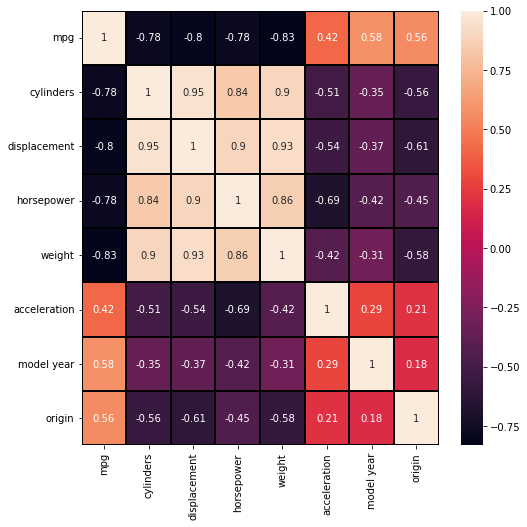

In [11]:
sns.heatmap(dataset.corr(),annot=True,linecolor ='black', linewidths = 1)#Heatmap is a way to show some sort of matrix plot,annot is used for correlation.
fig=plt.gcf()
fig.set_size_inches(8,8)

Seperating into Dependent and Independent variables

Independent variable

In [10]:
x=dataset[['cylinders','displacement','horsepower','weight','model year','origin']].values

In [11]:
x

array([[8.000e+00, 3.070e+02, 1.300e+02, 3.504e+03, 7.000e+01, 1.000e+00],
       [8.000e+00, 3.500e+02, 1.650e+02, 3.693e+03, 7.000e+01, 1.000e+00],
       [8.000e+00, 3.180e+02, 1.500e+02, 3.436e+03, 7.000e+01, 1.000e+00],
       ...,
       [4.000e+00, 1.350e+02, 8.400e+01, 2.295e+03, 8.200e+01, 1.000e+00],
       [4.000e+00, 1.200e+02, 7.900e+01, 2.625e+03, 8.200e+01, 1.000e+00],
       [4.000e+00, 1.190e+02, 8.200e+01, 2.720e+03, 8.200e+01, 1.000e+00]])

Dependent variable

In [12]:
y=dataset.iloc[:,0:1].values

In [13]:
y

array([[18. ],
       [15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [14. ],
       [14. ],
       [14. ],
       [15. ],
       [15. ],
       [14. ],
       [15. ],
       [14. ],
       [24. ],
       [22. ],
       [18. ],
       [21. ],
       [27. ],
       [26. ],
       [25. ],
       [24. ],
       [25. ],
       [26. ],
       [21. ],
       [10. ],
       [10. ],
       [11. ],
       [ 9. ],
       [27. ],
       [28. ],
       [25. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [28. ],
       [30. ],
       [30. ],
       [31. ],
       [35. ],
       [27. ],
       [26. ],
       [24. ],
       [25. ],
       [23. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17

Splitting into train and test data.

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)
# we are splitting as 90% train data and 10% test data

Normalizing

In [17]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
x_train = sd.fit_transform(x_train)
x_test = sd.fit_transform(x_test)
y_train = sd.fit_transform(y_train)
y_test = sd.fit_transform(y_test)


In [18]:
x_train

array([[ 1.46858608,  2.48230464,  2.97979869,  1.62455076, -1.61295698,
        -0.71873488],
       [ 1.46858608,  1.48729292,  1.55782064,  0.84358808, -1.61295698,
        -0.71873488],
       [-0.86550411, -0.70364636, -0.63978179, -0.36507278,  0.82235108,
        -0.71873488],
       ...,
       [-0.86550411, -1.21071964, -1.44126033, -1.31380657, -0.80118763,
         0.53032865],
       [ 0.30154098,  0.53055088, -0.12269887,  0.35799706, -1.3423672 ,
        -0.71873488],
       [-0.86550411, -1.00023639, -0.87246911, -0.89319732, -0.26000806,
         0.53032865]])